In [1]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#SKLearn stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pandas as pd
df = pd.read_csv('Credit_One_Data.csv')

In [4]:
df.dtypes

Unnamed: 0                     int64
ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [5]:
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,1,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,2,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,3,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,4,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [6]:
df.describe()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,14999.500000,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7499.750000,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,14999.500000,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22499.250000,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,29999.000000,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [7]:
df.groupby('EDUCATION')['SEX'].count()

EDUCATION
graduate school    10585
high school         4917
other                468
university         14030
Name: SEX, dtype: int64

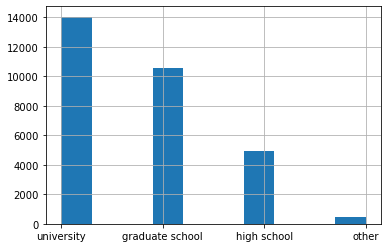

In [8]:
plt.hist(df['EDUCATION'])
plt.grid(True)
plt.show()

# education level on number of clients
# university - over 14000 clients
# graduate school - over 10000 clients
# high school - almost 5000 clients
# other - almost 500 clients


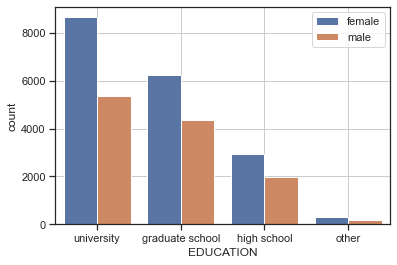

In [9]:
sns.set_theme(style="ticks", color_codes=True)

ax = sns.countplot(x="EDUCATION", hue="SEX", data=df)
plt.legend(loc='upper right', labels=['female', 'male'])
plt.grid()
plt.show()

# more females have higher level education than males

In [10]:
df.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

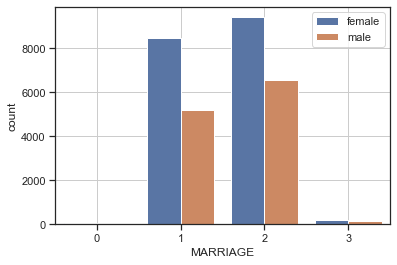

In [11]:
ax = sns.countplot(x="MARRIAGE", hue="SEX", data=df)
plt.legend(loc='upper right', labels=['female', 'male'])
plt.grid()
plt.show()

# marital status vs. gender
# more people are single than married
# female clients are more than male clients in each category

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


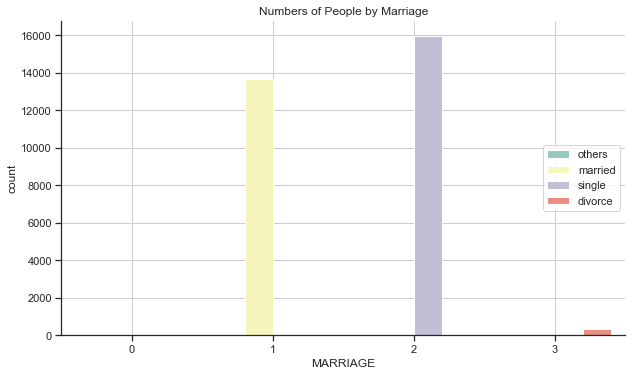

In [12]:
g = sns.factorplot(x='MARRIAGE', data=df, hue='MARRIAGE', kind='count', aspect=1.75, palette="Set3")
g.set_xlabels('MARRIAGE')
labels=('others', 'married', 'single', 'divorce')
x=[0,1,2,3]
positions = [0,1,2,3]
plt.xticks(positions)
plt.title ('Numbers of People by Marriage')
plt.legend(loc='right', labels=['others', 'married', 'single', 'divorce'])
plt.grid(True)
plt.show()

# number & marital status of our clients
# single - almost 16000 clients
# married - almost 14000 clients
# divorce - no many, a bit over 300
# others - very few, can't really see in the plot

In [13]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
760000        1
690000        1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [14]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

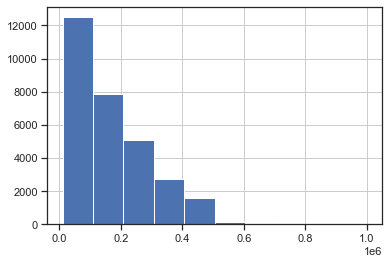

In [15]:
plt.hist(df['LIMIT_BAL'])
plt.grid(True)
plt.show()

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Limit Balances')

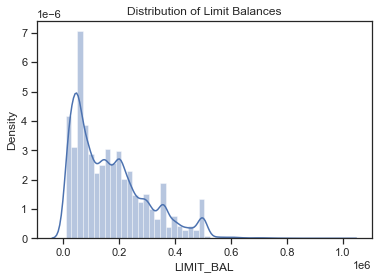

In [16]:
# Distribution of age, with an overlay of a density plot

LIMITB = df['LIMIT_BAL']
LIMITB_dist = sns.distplot(LIMITB)
LIMITB_dist.set_title("Distribution of Limit Balances")

In [35]:
df['AGE'].describe()

count    100.000000
mean      38.130000
std       10.469441
min       22.000000
25%       30.000000
50%       35.500000
75%       44.000000
max       73.000000
Name: AGE, dtype: float64

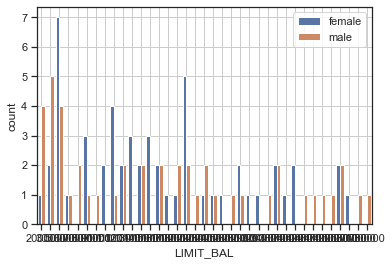

In [17]:
df=df.sample(100)
ax = sns.countplot(x="LIMIT_BAL", hue="SEX", data=df)
plt.legend(loc='upper right', labels=['female', 'male'])
plt.grid()
plt.show() #limit_bal for female is higher than male

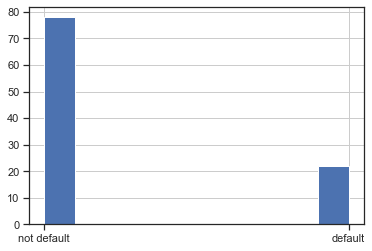

In [18]:
plt.hist(df['default payment next month'])
plt.grid(True)
plt.show()

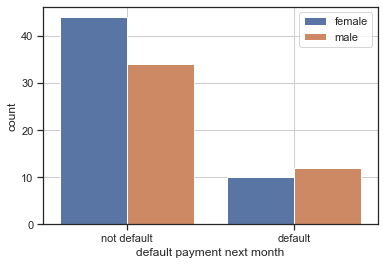

In [19]:
# plot graph to show default payment by gender

ax = sns.countplot(x="default payment next month", hue="SEX", data=df)
plt.legend(loc='upper right', labels=['female', 'male'])
plt.grid()
plt.show()

# in the not default section, female clients are more
# in the default section, male client tent to default more than females

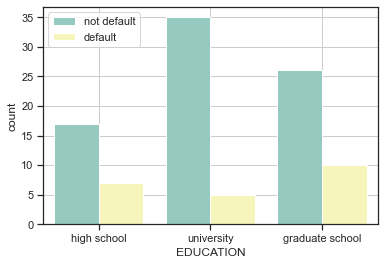

In [20]:
# plot graph to show default payment by education

ax = sns.countplot(x="EDUCATION", hue="default payment next month", data=df,  palette="Set3")
plt.legend(loc='upper left', labels=['not default', 'default'])
plt.grid()
plt.show()

# - Clients have university degree tent to default less, clients who default in this category are the least 
# - Clients have graduate school cert came to second, with the highest default number
# - Client have high school cert came to the third for not defaulting payment, however the number of people who defaulted payment are less than people have graduate school cert

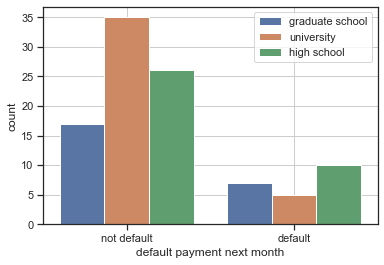

In [21]:
# plot graph to show education by default payment

ax = sns.countplot(x="default payment next month", hue="EDUCATION", data=df)
plt.legend(loc='upper right', labels=['graduate school', 'university', 'high school', 'others'])
plt.grid()
plt.show()

# number of clients with different level of education with no default payment from high to low
# University
# high school
# graduate school

# number of clients with different level of education with default payment from high to low
# high school
# graduate school
# university

# overall, clients with university degree tend to default less, clients with high school level
# education tend to default more. 

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


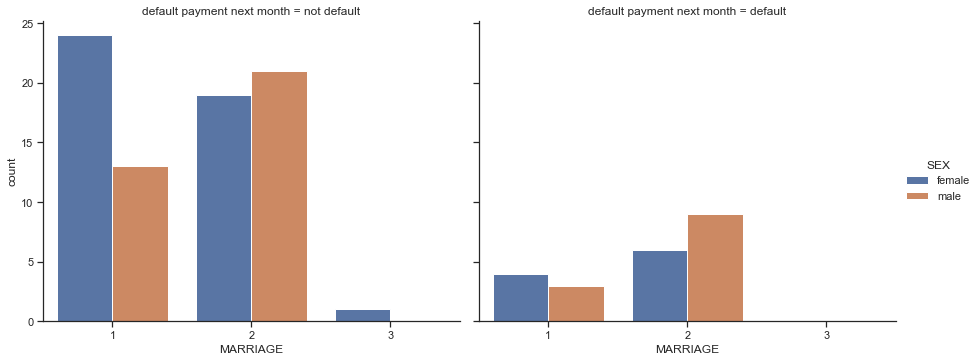

In [22]:
sns.factorplot('MARRIAGE', data=df, kind='count', hue='SEX', col='default payment next month', aspect=1.25, size=5)

# Default Payment vs. Marriage with Sex

# Not Default
# - Married females tend not to default more than married males
# - Single males tend not to default more than females

# Default
# - Married females tend to default more than males
# - Single males tend to default more than females

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


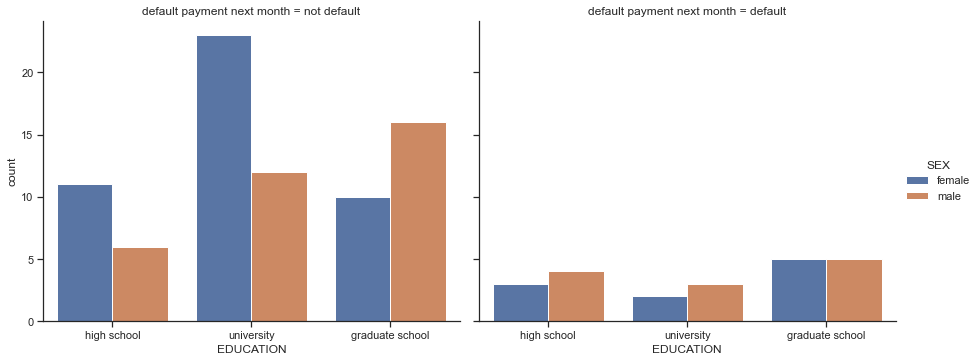

In [23]:
sns.factorplot('EDUCATION', data=df, kind='count', hue='SEX', col='default payment next month', aspect=1.25, size=5)


# Default Payment vs. Education with Sex

# Not Default
# - Female clients with University degree tend not to default more than male clients
# - Male clients with Graduate school education tend to not to default more than female clients
# - Female clients with High school education tend not to default more than males


# Default
# - Male clients with University degree tend to default more than females
# - Number of clients with Graduate school education seems to even with default payment
# - Males clients with High school education tend to default more than females

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


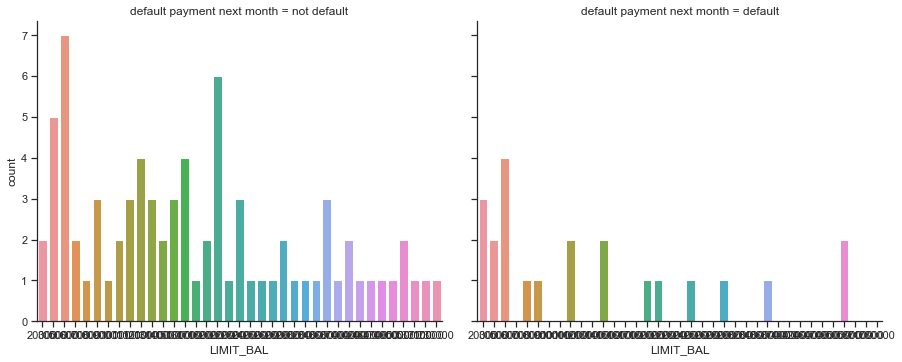

In [24]:
sns.factorplot('LIMIT_BAL', data=df, kind='count', col='default payment next month', aspect=1.25, size=5)


# Default Payment vs. Limit_Bal

# Not Default
# Clients are given higher credit limit more frequently

# Default
# Clients are given lower credit limit less frequently

<AxesSubplot:xlabel='Density', ylabel='AGE'>

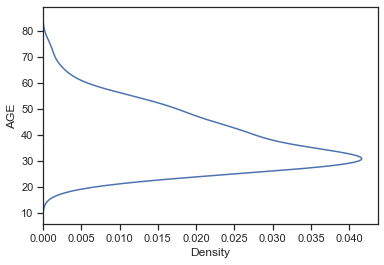

In [25]:
# KDPLOT 
# Plot a univariate distribution along the Y axis:

sns.kdeplot(data=df, y="AGE")

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution of Passengers' Ages")

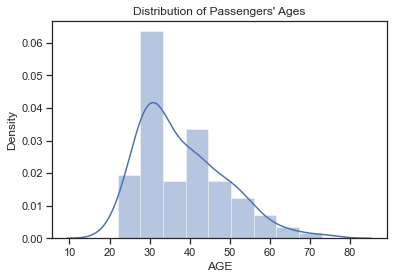

In [26]:
# Distribution of age, with an overlay of a density plot

AGE = df['AGE']
AGE_dist = sns.distplot(AGE)
AGE_dist.set_title("Distribution of Passengers' Ages")


# Density Distribution of Age

# The density of age distribution from high to low is:
# 1. Around 30 years old
# 2. Around 40 years old
# 3. Around 20 years old
# 4. Around 50 years old
# 5. Around 60 years old
# 6. Around 70 years old

<AxesSubplot:>

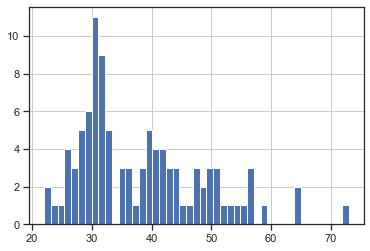

In [27]:
df['AGE'].hist(bins=45)

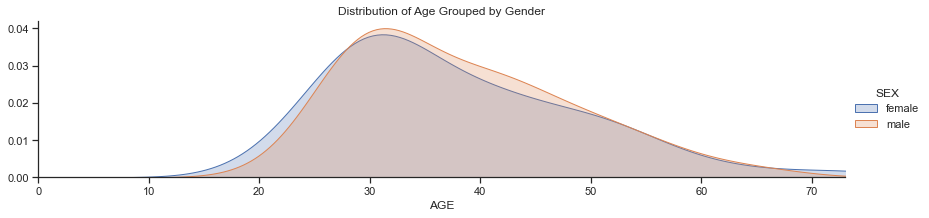

In [28]:
# kde plot, Distribution of Customers' Ages
# Grouped by Gender

fig = sns.FacetGrid(df, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

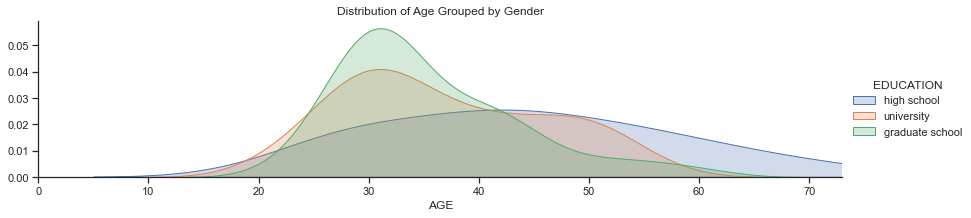

In [29]:
# Grouped by Education

fig = sns.FacetGrid(df, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


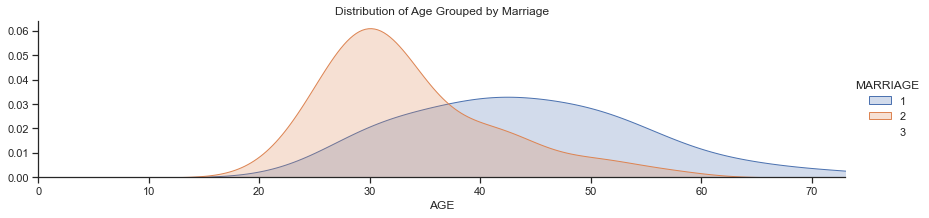

In [30]:
# Grouped by Marriage

fig = sns.FacetGrid(df, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Marriage')
fig.add_legend()

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


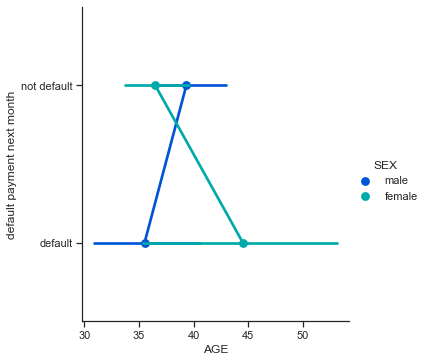

In [31]:
# factor plot

sns.factorplot('AGE', 'default payment next month', data=df, palette='winter', hue='SEX', 
               hue_order=['male', 'female'])

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


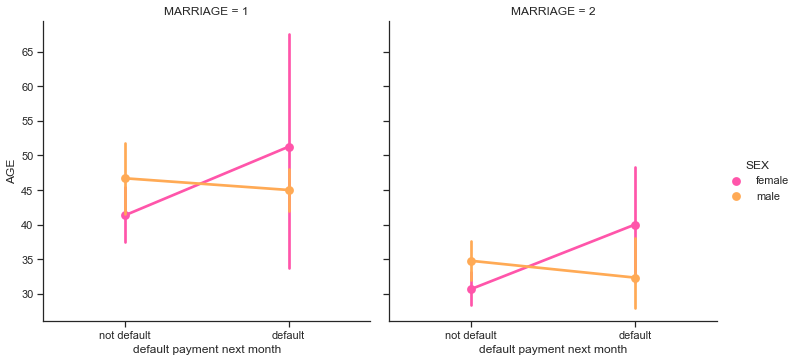

In [32]:
sns.factorplot('default payment next month', 'AGE', data=df, palette='spring', hue='SEX', 
               hue_order=['female', 'male'], col='MARRIAGE', col_order=[1,2])

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


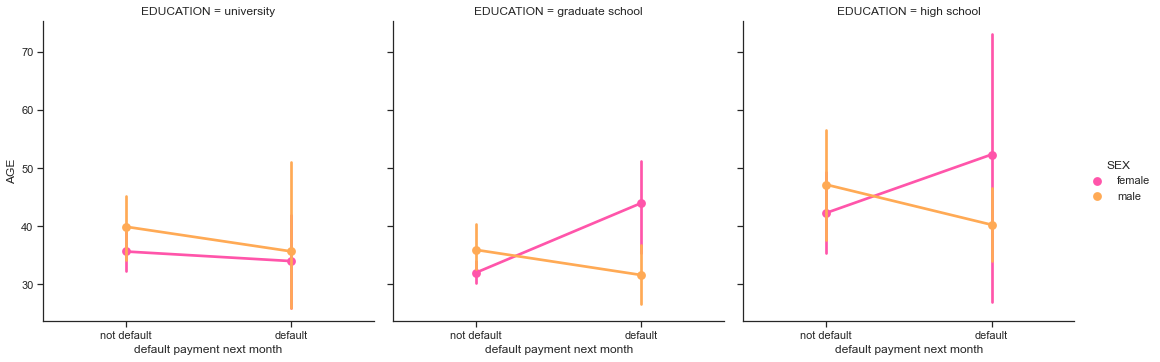

In [33]:
sns.factorplot('default payment next month', 'AGE', data=df, palette='spring', hue='SEX', 
               hue_order=['female', 'male'], col='EDUCATION', col_order=['university', 'graduate school', 'high school'])

In [34]:
y = np.random.rand(10,4)
y[:,7:12]=np.arange(10)
df = pd.DataFrame(y, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

ax =df.plot(x='count', y='PAY_0', kind='bar')
ax =df.plot(x='count', y='PAY_2', kind='bar', color='C2')
ax =df.plot(x='count', y='PAY_3', kind='bar', color='C3')
ax =df.plot(x='count', y='PAY_4', kind='bar', color='C4')
ax =df.plot(x='count', y='PAY_5', kind='bar', color='C5')
ax =df.plot(x='count', y='PAY_6', kind='bar', color='C6')

ValueError: could not broadcast input array from shape (10) into shape (10,0)

In [ ]:
repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
repayment.head()

In [ ]:
repayment.describe()

In [ ]:
repayment_df = df['repayment']
repayment_df.columns=['repayment']
sns.factorplot('repayment', data=df, kind='count', order=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], aspect=2, 
              palette='Greens_d')

In [36]:
# label encoding to convert object to number

le=LabelEncoder()

In [37]:
le.fit(df['SEX'])

LabelEncoder()

In [38]:
LabelEncoder()
df['SEX']=le.transform(df['SEX'])

In [39]:
LabelEncoder()
le.fit(df['EDUCATION'])
df['EDUCATION']=le.transform(df['EDUCATION'])

In [40]:
LabelEncoder()
le.fit(df['default payment next month'])
df['default payment next month']=le.transform(df['default payment next month'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 20298 to 13816
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  100 non-null    int64
 1   ID                          100 non-null    int64
 2   LIMIT_BAL                   100 non-null    int64
 3   SEX                         100 non-null    int64
 4   EDUCATION                   100 non-null    int64
 5   MARRIAGE                    100 non-null    int64
 6   AGE                         100 non-null    int64
 7   PAY_0                       100 non-null    int64
 8   PAY_2                       100 non-null    int64
 9   PAY_3                       100 non-null    int64
 10  PAY_4                       100 non-null    int64
 11  PAY_5                       100 non-null    int64
 12  PAY_6                       100 non-null    int64
 13  BILL_AMT1                   100 non-null    int64
 14  BILL

In [42]:
df.dtypes

Unnamed: 0                    int64
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [43]:
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
20298,20298,20299,200000,0,1,1,53,0,0,0,...,21594,19067,13814,2600,3224,0,8000,8000,8000,1
15409,15409,15410,140000,0,2,1,48,0,0,0,...,253418,258909,255232,10000,10200,9000,9000,10000,10000,1
4069,4069,4070,150000,0,2,2,30,0,0,2,...,73312,72015,76521,6000,0,8023,0,5700,0,1
3774,3774,3775,500000,0,0,2,32,-1,-1,-1,...,37945,104491,35234,39560,302961,38139,104673,35387,177258,1
13752,13752,13753,500000,1,0,2,39,0,0,0,...,43180,1095,856,20000,12000,0,1095,856,50000,1


In [44]:
df.sample(10)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6652,6652,6653,530000,0,1,1,50,0,0,0,...,275847,163157,164838,10000,10000,10000,7000,7000,5000,1
16550,16550,16551,220000,1,2,1,28,0,0,0,...,65321,83882,72812,6000,5000,20012,23099,10029,30019,1
26424,26424,26425,110000,0,2,1,43,0,0,0,...,99666,102082,105500,4500,5000,4000,4000,5000,6804,1
11898,11898,11899,200000,0,1,2,29,-1,-1,-1,...,3678,32405,30943,1000,2244,3678,31996,1097,1579,1
13816,13816,13817,50000,0,2,2,23,0,0,2,...,13656,15918,10771,3500,2500,1980,3500,1000,0,1
13294,13294,13295,280000,0,0,2,26,0,0,0,...,36594,37010,36334,1700,1600,1300,1500,2000,99334,1
28356,28356,28357,170000,0,2,2,43,0,0,0,...,141314,139252,139205,7000,7000,7000,5100,5300,5030,1
27915,27915,27916,50000,0,0,2,27,3,2,2,...,300,300,300,0,0,0,0,0,0,0
3774,3774,3775,500000,0,0,2,32,-1,-1,-1,...,37945,104491,35234,39560,302961,38139,104673,35387,177258,1
4999,4999,5000,160000,1,0,2,40,-1,-1,-1,...,715,715,865,0,715,715,715,865,715,1


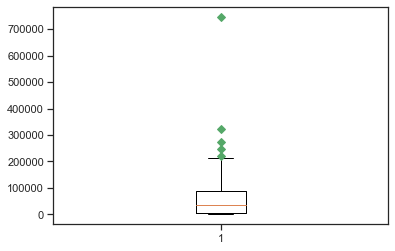

In [45]:
A = df['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

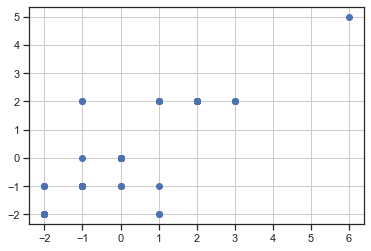

In [46]:
x = df['PAY_0']
y = df['PAY_2']

plt.scatter(x,y)
plt.grid(True)
plt.show()

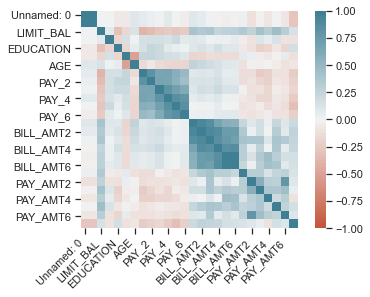

In [47]:
# plot heatmap to show correlation 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [48]:
# correlation between age # limit_bal

df['LIMIT_BAL'].corr(df['AGE'])

0.12740085697655024

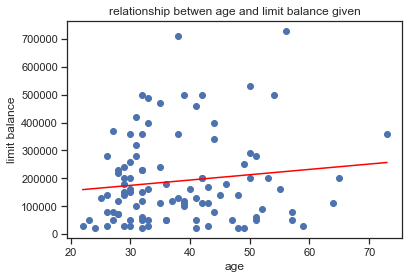

In [49]:
# scatterplot shows relationship between age & limit_bal

data_sample = df.sample(100)

x = data_sample['AGE']
y = data_sample['LIMIT_BAL']

fig, ax = plt.subplots()
plt.scatter(x,y, marker='o')

ax.set(xlabel='age', ylabel='limit balance',
       title='relationship betwen age and limit balance given')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.show()

In [50]:
# find correlation between different variables (columns)

# correlation between limit_bal & default payment
print(df['LIMIT_BAL'].corr(df['default payment next month'])) 

0.14737422813619713


<AxesSubplot:xlabel='default payment next month', ylabel='LIMIT_BAL'>

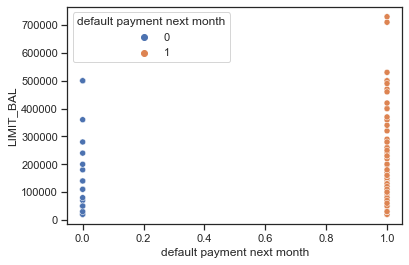

In [51]:
data_sample = df.sample(100)
sns.scatterplot(x='default payment next month', y='LIMIT_BAL', hue='default payment next month',  data=data_sample)

<AxesSubplot:xlabel='default payment next month', ylabel='LIMIT_BAL'>

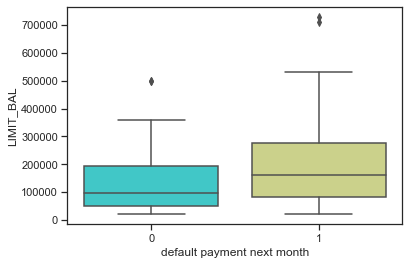

In [52]:
data_sample = df.sample(100)
sns.boxplot(x='default payment next month',y='LIMIT_BAL',data=data_sample,palette='rainbow')

In [53]:
# correlation between gender & default payment
print(df['SEX'].corr(df['default payment next month'])) 

-0.091059112201637


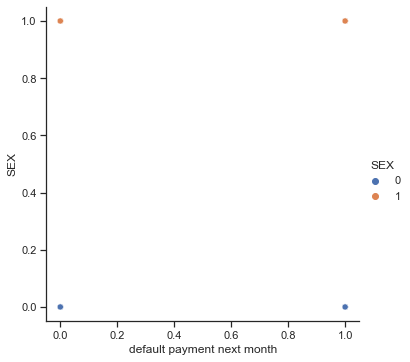

In [54]:
# plot relplot to show relationship between default payment & gender
sns.relplot(x ="default payment next month", y ="SEX", hue ="SEX", data = df)

<AxesSubplot:xlabel='default payment next month', ylabel='SEX'>

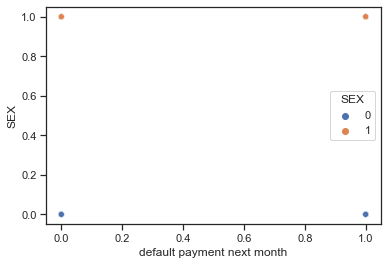

In [55]:
sns.scatterplot(x ="default payment next month", y ="SEX", hue ="SEX", data = df)

In [56]:
# correlation between gender & default payment
print(df['EDUCATION'].corr(df['default payment next month'])) 

0.16299321348674922


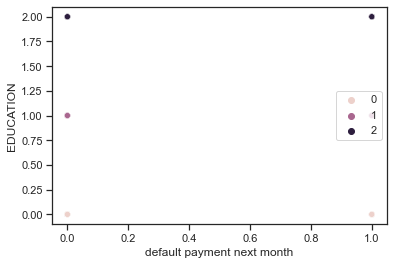

In [57]:
sns.scatterplot(x ="default payment next month", y ="EDUCATION", hue ="EDUCATION", data = df)
plt.legend(loc='right')

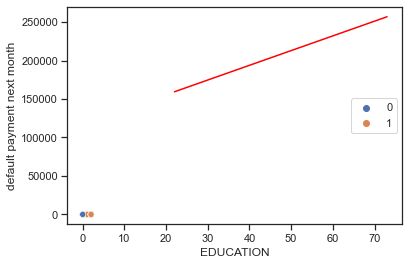

In [58]:

# changed the Axis X & Y to see if anything changed

sns.scatterplot(x ="EDUCATION", y ="default payment next month", hue ="default payment next month", data = df)
plt.legend(loc='right')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

In [59]:
df['MARRIAGE'].corr(df['default payment next month'])

-0.11533778359696378

In [60]:
# plot to show relationship between marriage & default payment

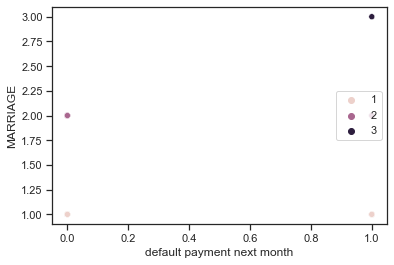

In [61]:
sns.scatterplot(x ="default payment next month", y ="MARRIAGE", hue ="MARRIAGE", data = df)
plt.legend(loc='right')

In [62]:
# correlation between repayment & default payment

df['PAY_0'].corr(df['default payment next month'])

-0.23395248334637542

In [63]:
df['PAY_2'].corr(df['default payment next month'])

-0.18862377191142163

In [64]:
df['PAY_3'].corr(df['default payment next month'])

-0.16279071743404638

In [65]:
df['PAY_4'].corr(df['default payment next month'])

-0.23868973825869932

In [66]:
df['PAY_5'].corr(df['default payment next month'])

-0.32597727018886674

In [67]:
df['PAY_6'].corr(df['default payment next month'])

-0.21447622026338992

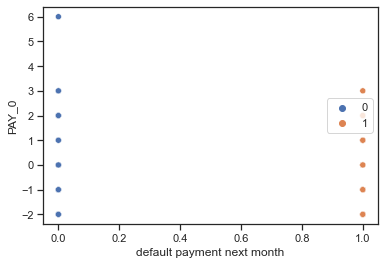

In [68]:
sns.scatterplot(x ="default payment next month", y ="PAY_0", hue ="default payment next month", data = df)
plt.legend(loc='right')

<AxesSubplot:xlabel='default payment next month', ylabel='PAY_0'>

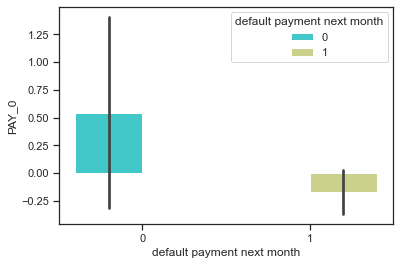

In [69]:
sns.barplot(x='default payment next month',y='PAY_0', hue='default payment next month', data=df, palette='rainbow')

In [70]:
# correlation between bill amount & default payment

df['BILL_AMT1'].corr(df['default payment next month'])

0.21068586618721336

In [71]:
df['BILL_AMT2'].corr(df['default payment next month'])

0.26199113723159767

In [72]:
df['BILL_AMT3'].corr(df['default payment next month'])

0.2572240411166891

In [73]:
df['BILL_AMT4'].corr(df['default payment next month'])

0.24136701214673412

In [74]:
df['BILL_AMT5'].corr(df['default payment next month'])

0.15902475854485656

In [75]:
df['BILL_AMT6'].corr(df['default payment next month'])

0.15580034832532474

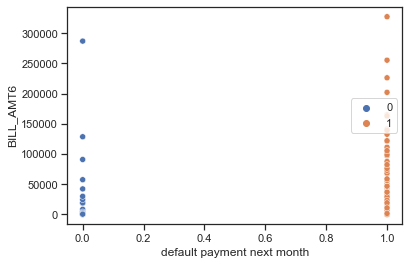

In [76]:
sns.scatterplot(x ="default payment next month", y ="BILL_AMT6", hue ="default payment next month", data = df)
plt.legend(loc='right')

<AxesSubplot:xlabel='default payment next month', ylabel='BILL_AMT6'>

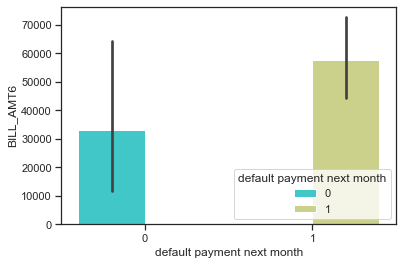

In [77]:
sns.barplot(x='default payment next month',y='BILL_AMT6', hue='default payment next month', data=df, palette='rainbow')

In [78]:
# correlation between pay amount & default payment

df['PAY_AMT1'].corr(df['default payment next month'])

0.12523401644303786

In [79]:
df['PAY_AMT2'].corr(df['default payment next month'])

0.0976037161673755

In [80]:
df['PAY_AMT3'].corr(df['default payment next month'])

0.039658650400847734

In [81]:
df['PAY_AMT4'].corr(df['default payment next month'])

-0.08611411743994733

In [82]:
df['PAY_AMT5'].corr(df['default payment next month'])

0.15938596470039743

In [83]:
df['PAY_AMT6'].corr(df['default payment next month'])

0.11210095167163306

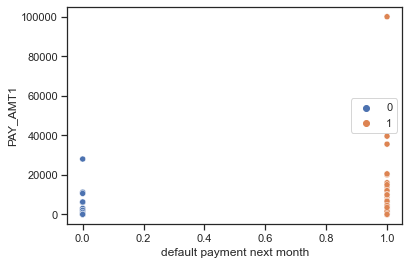

In [84]:
sns.scatterplot(x ="default payment next month", y ="PAY_AMT1", hue ="default payment next month", data = df)
plt.legend(loc='right')

<AxesSubplot:xlabel='default payment next month', ylabel='PAY_AMT1'>

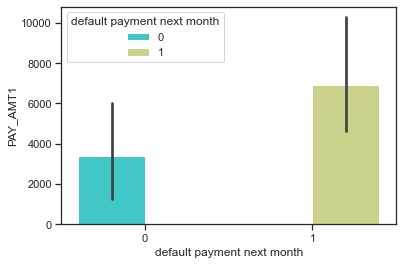

In [85]:
sns.barplot(x='default payment next month',y='PAY_AMT1', hue='default payment next month', data=df, palette='rainbow')

In [88]:
df['AGE'].corr(df['default payment next month'])

-0.0744811108617665